## PANAMBI - RS

In [1]:
import pandas as pd
import basedosdados as bd
import geopandas as gpd
from shapely import wkt
import numpy as np

In [2]:
df = bd.read_sql('''SELECT * FROM basedosdados.br_geobr_mapas.municipio WHERE id_municipio = "4313904"''',
                 billing_project_id="dados-brisa")

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54rows/s]


In [3]:
df

,id_municipio,sigla_uf,geometria
0,4313904,RS,MULTIPOLYGON (((-53.5770583132939 -28.24088160...


In [4]:
df['wkt'] = df.geometria.apply(wkt.loads)

In [5]:
df

,id_municipio,sigla_uf,geometria,wkt
0,4313904,RS,MULTIPOLYGON (((-53.5770583132939 -28.24088160...,(POLYGON ((-53.5770583132939 -28.2408816013119...


In [6]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4674', geometry='wkt')

<AxesSubplot: >

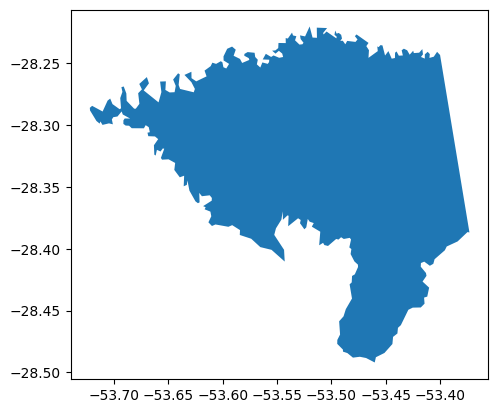

In [7]:
gdf.plot()

### DADOS DE EDUCAÇÃO EM PANAMBI - RS

In [8]:
rs_escolas = bd.read_sql('''SELECT * FROM basedosdados.br_geobr_mapas.escola WHERE sigla_uf = "RS"''',
                 billing_project_id="dados-brisa")

Downloading: 100%|██████████████████████████████████████████████████████████| 11702/11702 [00:00<00:00, 12389.16rows/s]


In [9]:
# Escolas no RS
rs_escolas

,sigla_uf,id_escola,geometria
0,RS,43000010,POINT EMPTY
1,RS,43000029,POINT (-51.00641 -29.63535)
2,RS,43000037,POINT EMPTY
3,RS,43000045,POINT EMPTY
4,RS,43000053,POINT (-57.08653 -29.76902)
...,...,...,...
11697,RS,43387063,POINT EMPTY
11698,RS,43390056,POINT (-52.41656 -29.70498)
11699,RS,43391052,POINT EMPTY
11700,RS,43391060,POINT (-52.17008 -29.63633)


In [70]:
rs_escolas.to_excel('escolas_rs.xlsx')

#### Filtrando apenas as escolas com COORDENADAS

In [10]:
df_final = rs_escolas.loc[rs_escolas['geometria']=='POINT EMPTY']

In [11]:
ultimo_df = rs_escolas.drop(df_final.index)

In [12]:
ultimo_df

,sigla_uf,id_escola,geometria
1,RS,43000029,POINT (-51.00641 -29.63535)
4,RS,43000053,POINT (-57.08653 -29.76902)
6,RS,43000150,POINT (-57.08822 -29.76224)
7,RS,43000193,POINT (-51.80265 -29.50756)
8,RS,43000207,POINT (-54.07276 -31.33214)
...,...,...,...
11693,RS,43384072,POINT (-53.50208 -28.30091)
11696,RS,43387055,POINT (-51.81773 -30.85143)
11698,RS,43390056,POINT (-52.41656 -29.70498)
11700,RS,43391060,POINT (-52.17008 -29.63633)


In [13]:
# Trasnformando a coluna de coordenadas em WKT
ultimo_df['coords'] = gpd.GeoSeries.from_wkt(ultimo_df['geometria'])
ultimo_df

,sigla_uf,id_escola,geometria,coords
1,RS,43000029,POINT (-51.00641 -29.63535),POINT (-51.00641 -29.63535)
4,RS,43000053,POINT (-57.08653 -29.76902),POINT (-57.08653 -29.76902)
6,RS,43000150,POINT (-57.08822 -29.76224),POINT (-57.08822 -29.76224)
7,RS,43000193,POINT (-51.80265 -29.50756),POINT (-51.80265 -29.50756)
8,RS,43000207,POINT (-54.07276 -31.33214),POINT (-54.07276 -31.33214)
...,...,...,...,...
11693,RS,43384072,POINT (-53.50208 -28.30091),POINT (-53.50208 -28.30091)
11696,RS,43387055,POINT (-51.81773 -30.85143),POINT (-51.81773 -30.85143)
11698,RS,43390056,POINT (-52.41656 -29.70498),POINT (-52.41656 -29.70498)
11700,RS,43391060,POINT (-52.17008 -29.63633),POINT (-52.17008 -29.63633)


<AxesSubplot: >

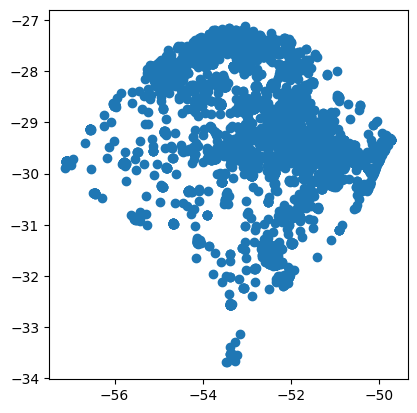

In [14]:
# Transformando DataFrame em GeoDataFrame
shp_rs_esc = gpd.GeoDataFrame(ultimo_df, crs='epsg:4674', geometry='coords')
shp_rs_esc.plot()

<AxesSubplot: >

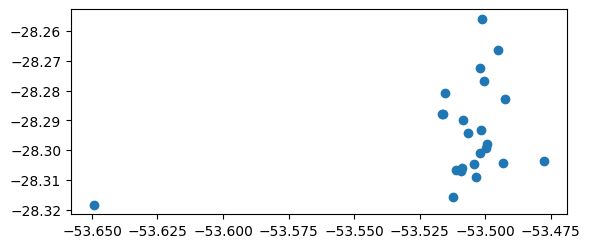

In [15]:
# Recortando os pontos de escolas para o município de Panambi
recorte = gpd.clip(shp_rs_esc, gdf)
recorte.plot()

In [16]:
# Salvando shapefile
recorte.to_file('C:\\Users\\rodri\\Downloads\\RS\\panambi\\escolas_geobr_panambi\\panambi_escolas.shp')

#### DADOS DE MATRÍCULAS NAS ESCOLAS EM PANAMBI - RS

In [17]:
# Download dos dados
matriculas = bd.read_sql('''SELECT * FROM basedosdados.br_inep_censo_escolar.matricula WHERE id_municipio = "4313904"''',
                 billing_project_id="dados-brisa")

Downloading: 100%|█████████████████████████████████████████████████████████| 155949/155949 [01:58<00:00, 1315.20rows/s]


In [72]:
matriculas.head()

,ano,sigla_uf,id_municipio,id_distrito,id_escola,rede,id_turma,id_aluno,id_pessoa_fisica,id_matricula,...,especial_exclusiva,regular,eja,profissionalizante,id_curso_educ_profissional,mediacao_didatico_pedagogica,unificada,tipo_atendimento_turma,tipo_local_turma,tipo_turma
0,2008,RS,4313904,431390405,43096891,3,7769557,6E8F42433092507F5C1C93ECC68FFE69,None,218706966,...,<NA>,<NA>,<NA>,<NA>,None,1,0,None,None,4
1,2008,RS,4313904,431390405,43096824,2,7202332,CDD35395A0EF333AED4149087F614DF5,None,226262074,...,0,1,0,0,None,1,0,None,None,0
2,2008,RS,4313904,431390405,43096891,3,8477323,6FDCD1689C814866A56D830731064DA9,None,231881699,...,<NA>,<NA>,<NA>,<NA>,None,1,0,None,None,4
3,2008,RS,4313904,431390405,43096565,3,8547213,78BE4E446CCED7F59F62A8105CC86089,None,235013237,...,<NA>,<NA>,<NA>,<NA>,None,1,0,None,None,4
4,2008,RS,4313904,431390405,43096565,3,8547213,24E39076C8DC3B7A0109593A79143ADB,None,235013863,...,<NA>,<NA>,<NA>,<NA>,None,1,0,None,None,4


In [18]:
# Matrículas em 2020
matriculas_2020 = matriculas[matriculas['ano'] == 2020]
matriculas_2020

,ano,sigla_uf,id_municipio,id_distrito,id_escola,rede,id_turma,id_aluno,id_pessoa_fisica,id_matricula,...,especial_exclusiva,regular,eja,profissionalizante,id_curso_educ_profissional,mediacao_didatico_pedagogica,unificada,tipo_atendimento_turma,tipo_local_turma,tipo_turma
44464,2020,RS,4313904,431390405,43206549,4,752187,AB2C19CAD751E6BF3FB953983589A942,None,115901663,...,0,1,0,0,None,1,0,1,0,None
44465,2020,RS,4313904,431390405,43206549,4,752187,7691AC671B2ED850C23BA70E63278C82,None,183966735,...,0,1,0,0,None,1,0,1,0,None
44466,2020,RS,4313904,431390405,43206549,4,752187,0B48C5820C59F7E23F0590B022E3ECA7,None,183990290,...,0,1,0,0,None,1,0,1,0,None
44467,2020,RS,4313904,431390405,43206549,4,752187,0E69C48C79DBB2A3FBB072D5189F8CC4,None,183996972,...,0,1,0,0,None,1,0,1,0,None
44468,2020,RS,4313904,431390405,43206549,4,752187,3CB120FE668D40560CC1206B5EDC3BB5,None,183997021,...,0,1,0,0,None,1,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54373,2020,RS,4313904,431390405,43096549,4,21835665,1A2FAC1B504A74CD23DEAE5F2BF165E1,None,451823803,...,0,0,0,1,3044,1,5,1,0,None
54374,2020,RS,4313904,431390405,43096549,4,21835665,90FA870F445EFAE5CEE4CA8A378C08BD,None,451823820,...,0,0,0,1,3044,1,5,1,0,None
54375,2020,RS,4313904,431390405,43096549,4,21835665,F6518B7559A94098D2C3F30ACF3F33EB,None,451823855,...,0,0,0,1,3044,1,5,1,0,None
54376,2020,RS,4313904,431390405,43096549,4,21835665,2B3307FBEC7537EB52C0EB0E45EC0873,None,451823879,...,0,0,0,1,3044,1,5,1,0,None


In [37]:
# Agrupando o número de matrículas em 2020 por escola
df_mat = matriculas_2020.groupby('id_escola').agg('count').reset_index()
df_mat.dtypes

id_escola                       object
ano                              int64
sigla_uf                         int64
id_municipio                     int64
id_distrito                      int64
                                 ...  
mediacao_didatico_pedagogica     int64
unificada                        int64
tipo_atendimento_turma           int64
tipo_local_turma                 int64
tipo_turma                       int64
Length: 96, dtype: object

In [20]:
# Merge do shapefile das escolas com as matrículas em 2020
mat_2020 = pd.merge(recorte, df_mat, on=['id_escola', 'id_escola'])
mat_2020

,sigla_uf_x,id_escola,geometria,coords,ano,sigla_uf_y,id_municipio,id_distrito,rede,id_turma,...,especial_exclusiva,regular,eja,profissionalizante,id_curso_educ_profissional,mediacao_didatico_pedagogica,unificada,tipo_atendimento_turma,tipo_local_turma,tipo_turma
0,RS,43096751,POINT (-53.64941 -28.31838),POINT (-53.64941 -28.31838),50,50,50,50,50,50,...,50,50,50,50,0,50,50,50,50,0
1,RS,43096565,POINT (-53.5121 -28.31586),POINT (-53.51210 -28.31586),382,382,382,382,382,382,...,373,373,373,373,0,382,373,382,382,0
2,RS,43186122,POINT (-53.50354 -28.30882),POINT (-53.50354 -28.30882),86,86,86,86,86,86,...,86,86,86,86,0,86,86,86,86,0
3,RS,43186106,POINT (-53.50936 -28.30687),POINT (-53.50936 -28.30687),210,210,210,210,210,210,...,210,210,210,210,0,210,210,210,210,0
4,RS,43096859,POINT (-53.51118 -28.30664),POINT (-53.51118 -28.30664),303,303,303,303,303,303,...,281,281,281,281,0,303,281,303,303,0
5,RS,43096875,POINT (-53.50895 -28.30604),POINT (-53.50895 -28.30604),1033,1033,1033,1033,1033,1033,...,1018,1018,1018,1018,0,1033,1018,1033,1033,0
6,RS,43096816,POINT (-53.50415 -28.30468),POINT (-53.50415 -28.30468),469,469,469,469,469,469,...,434,434,434,434,0,469,434,469,469,0
7,RS,43096840,POINT (-53.49311 -28.30424),POINT (-53.49311 -28.30424),292,292,292,292,292,292,...,285,285,285,285,0,292,285,292,292,0
8,RS,43096697,POINT (-53.47736 -28.30362),POINT (-53.47736 -28.30362),350,350,350,350,350,350,...,345,345,345,345,0,350,345,350,350,0
9,RS,43384072,POINT (-53.50208 -28.30091),POINT (-53.50208 -28.30091),37,37,37,37,37,37,...,0,0,0,0,0,37,0,37,37,0


In [21]:
# Salvando shapefile de matrículas em 2020
mat_2020.to_file('C:\\Users\\rodri\\Downloads\\RS\\panambi\\escolas_geobr_panambi\\panambi_escolas_mat_2020.shp')

In [22]:
# Agrupando o número de matrículas por escola e por ano
mat_geral = matriculas[['ano','id_escola']].groupby(['id_escola','ano']).value_counts()
mat_geral

id_escola  ano 
43000428   2011    281
           2012    378
           2013    508
           2014    517
           2015    630
                  ... 
43384072   2016     21
           2017     23
           2018     29
           2019     28
           2020     37
Length: 495, dtype: int64

In [67]:
# Transformando os anos em colunas
pivot = mat_geral.reset_index()
pivot.head()
df_novo = pivot.pivot(index='id_escola', columns='ano')
# Preenchendo NaN com zero
df_novo.fillna(0, inplace=True)
df_novo

0                                                          \
ano          2007    2008    2009    2010    2011    2012    2013    2014   
id_escola                                                                   
43000428      0.0     0.0     0.0     0.0   281.0   378.0   508.0   517.0   
43005675      0.0     0.0     0.0     0.0     0.0     0.0    88.0   100.0   
43012400      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43096549   1104.0  1135.0  1212.0  1149.0  1089.0  1078.0  1103.0  1145.0   
43096565    478.0   730.0   776.0   867.0   853.0   883.0   794.0   734.0   
43096590    354.0   581.0   612.0   543.0   444.0   475.0   520.0   663.0   
43096697    420.0   709.0   666.0   596.0   710.0   632.0   456.0   480.0   
43096700    102.0   175.0   196.0   150.0   151.0   140.0   121.0   146.0   
43096719    233.0   325.0   284.0   271.0   298.0   289.0   231.0   189.0   
43096727    192.0   158.0   181.0   216.0   201.0   260.0   290.0   303.0   
43096751     83.0    86.0    82.0    78.0    78.0    76.0    72.0    79.0   
43096786     91.0   111.0   116.0   130.0   202.0   100.0   110.0   115.0   
43096808    532.0   565.0   663.0   727.0   678.0   809.0   798.0   772.0   
43096816    548.0   554.0   448.0   517.0   566.0   571.0   519.0   621.0   
43096824    762.0   700.0   627.0   624.0   578.0   589.0   608.0   597.0   
43096840    384.0   645.0   552.0   696.0   657.0   530.0   536.0   549.0   
43096859    248.0   443.0   422.0   392.0   433.0   405.0   391.0   386.0   
43096867    659.0  1019.0   991.0   959.0   957.0   859.0   931.0   995.0   
43096875   1272.0  1173.0  1112.0  1107.0  1055.0  1325.0  1182.0  1223.0   
43096891    252.0   596.0   443.0   458.0   452.0   436.0   406.0   412.0   
43132464      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43176810    698.0   668.0   509.0   512.0   480.0   646.0   628.0   675.0   
43178650     42.0    61.0   116.0     0.0     0.0     0.0     0.0     0.0   
43179517     88.0    89.0    68.0    58.0    61.0    66.0    69.0    72.0   
43186084    110.0   113.0   123.0   121.0   124.0   121.0   134.0   141.0   
43186092     40.0    38.0    60.0    58.0    64.0    70.0    65.0    81.0   
43186106    166.0   185.0   202.0   187.0   153.0   202.0   197.0   216.0   
43186114     53.0    54.0    56.0    44.0    52.0    49.0    52.0   144.0   
43186122     62.0    62.0    78.0    86.0    78.0    69.0    80.0    85.0   
43186130    117.0   122.0   135.0   111.0   116.0   122.0   125.0   123.0   
43186149     42.0    43.0    54.0    46.0    52.0    51.0   144.0   143.0   
43189539      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43199739     14.0    24.0    34.0    34.0    55.0    49.0    51.0    47.0   
43199747     14.0    23.0    18.0    22.0    25.0    20.0    15.0    22.0   
43199755    108.0   105.0   100.0    99.0   110.0   100.0   129.0   136.0   
43203183     85.0   122.0   125.0   195.0   224.0   274.0   258.0   265.0   
43206549     42.0    44.0    52.0    68.0    75.0    83.0    85.0    85.0   
43212425     11.0    22.0    26.0    29.0    39.0     0.0     0.0     0.0   
43212638      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43298222      0.0     0.0    24.0    24.0    21.0    47.0    57.0    39.0   
43384072      0.0     0.0     0.0    29.0    25.0    20.0    11.0    17.0   

                                                           
ano          2015    2016    2017    2018    2019    2020  
id_escola                                                  
43000428    630.0   727.0   604.0   490.0   453.0   451.0  
43005675    110.0   108.0   105.0    88.0    89.0    73.0  
43012400     39.0    44.0    40.0    38.0    49.0    42.0  
43096549   1114.0   995.0   806.0   995.0  1065.0  1082.0  
43096565    534.0   564.0   477.0   642.0   630.0   382.0  
43096590    321.0   287.0   353.0   376.0   306.0   256.0  
43096697    386.0   389.0   404.0   520.0   393.0   350.0  
43096700     98.0   104.0  

In [69]:
# Exportando tabela
df_novo.to_excel("matriculas_escolas.xlsx")